# A Loan Approval Prediction Model Assessment for Concept Group Senior Data Analyst Role.
By Abdulbasit and AI

---

## 1: Understanding the Problem
We need to predict the outcome of a loan application (approval or denial) using the provided historical data. 
This is a binary classification problem
1. The Input: Features like the credit score, employment lenght, Annual income, loan amount etc.
2. The Output: A loan approval decision, approved (1) or denied (0)

## 2: Planning the Solution
Here's a breakdown of the steps I'll take to complete this loan approval prediction model

1. **Import Libraries**: Import all necessary Python libraries (pandas, numpy, scikit-learn, matplotlib, seaborn).

2. **Load Data**: Load the loan_application_data.csv file into a pandas DataFrame.

3. **Exploratory Data Analysis (EDA)**: Perform EDA to understand the data, including data types, summary statistics, distributions of key variables, missing values, and correlations between features. Visualizations are crucial here (histograms, box plots, scatter plots, etc.).

4. **Data Cleaning**: Handle missing values (imputation or removal) and outliers (clipping, transformation, or removal). These choices would be justified in the code for handling missing data/outliers.

5. **Feature Engineering**: Create new features (Debt-To-Income, Loan-to-Income Ratio, Employment Length) from existing columns. Handle potential errors (e.g., division by zero, invalid dates).

6. **Data Preprocessing**: Prepare the data for modeling. This includes:

    1. Encoding categorical features (one-hot encoding, label encoding).
    2. Scaling numerical features (standardization, min-max scaling).
    3. Splitting the data into training and testing sets.

7. **Model Selection and Training**: Choose an appropriate machine learning algorithm (logistic regression, decision tree, random forest, etc.). Train the model on the training data. Use cross-validation for model evaluation.

8. **Model Evaluation**: Evaluate the performance of the model on the testing set using relevant metrics (accuracy, precision, recall, F1-score, AUC-ROC). Justification for my choice of metrics in the code for model evaluation. Present results in a clear and concise manner using classification reports and confusion matrices.

9. **Model Selection**: Choose the best-performing model based on the evaluation metrics.

10. **Model Interpretation**: Interpret the chosen model. For example, analyze feature importances (for tree-based models) or coefficients (for logistic regression) to understand which features are most influential in predicting loan approval.

11. **Report Generation**: Create a well-documented report summarizing my findings, including EDA results, data cleaning and feature engineering steps, model selection and evaluation, and model interpretation. Including relevant visualizations.

### Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Libraries successfully imported")

Libraries successfully imported


### Step 2: Loading the data

In [68]:
try:
    df = pd.read_csv('loan_application_data.csv')
    print("Data loaded successfully!\n")
except FileNotFoundError:
    print("Named file is missing from the directory, kindly double-check the file name and locationa and try again\n")
except Exception as e:
    print(f"Something's wrong, {e}\n")


Data loaded successfully!



### Step 3: Exploratory Data Analysis

In [69]:
# Display first 5 rows of the data
print("Snippet of the data\n")
display(df.head())


# Display information about the columns of the data and its shape
print("\nData Shape:\n",df.shape)
print("\nDataset Info")
print(df.info())

# Display summary statistics about the data
print("\nDataset Description\n",df.describe())


Snippet of the data



,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved



Data Shape:
 (1000, 8)

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ApplicationDate      1000 non-null   object
 1   CreditScore          1000 non-null   int64 
 2   AnnualIncome         1000 non-null   int64 
 3   LoanAmount           1000 non-null   int64 
 4   EmploymentStatus     1000 non-null   object
 5   OutstandingDebt      1000 non-null   int64 
 6   EmploymentStartDate  1000 non-null   object
 7   LoanOutcome          1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB
None

Dataset Description
        CreditScore  AnnualIncome    LoanAmount  OutstandingDebt
count  1000.000000  1.000000e+03  1.000000e+03      1000.000000
mean    576.893000  9.111708e+06  5.129975e+06    256927.025000
std     160.641262  3.461877e+06  2.891096e+06    143362.249257
min     301.000000  3.019496e+06 

In [70]:
# Descriptive Statistics about the numerical columns
numerical_features = df.select_dtypes(include=['number'])
print("Descriptive statistics for numerical columns only \n",numerical_features.describe())

Descriptive statistics for numerical columns only 
        CreditScore  AnnualIncome    LoanAmount  OutstandingDebt
count  1000.000000  1.000000e+03  1.000000e+03      1000.000000
mean    576.893000  9.111708e+06  5.129975e+06    256927.025000
std     160.641262  3.461877e+06  2.891096e+06    143362.249257
min     301.000000  3.019496e+06  9.348400e+04        72.000000
25%     434.000000  6.284852e+06  2.609138e+06    137270.500000
50%     580.500000  9.227958e+06  5.359583e+06    263305.500000
75%     714.000000  1.208609e+07  7.652186e+06    383105.250000
max     849.000000  1.495861e+07  9.974945e+06    499735.000000


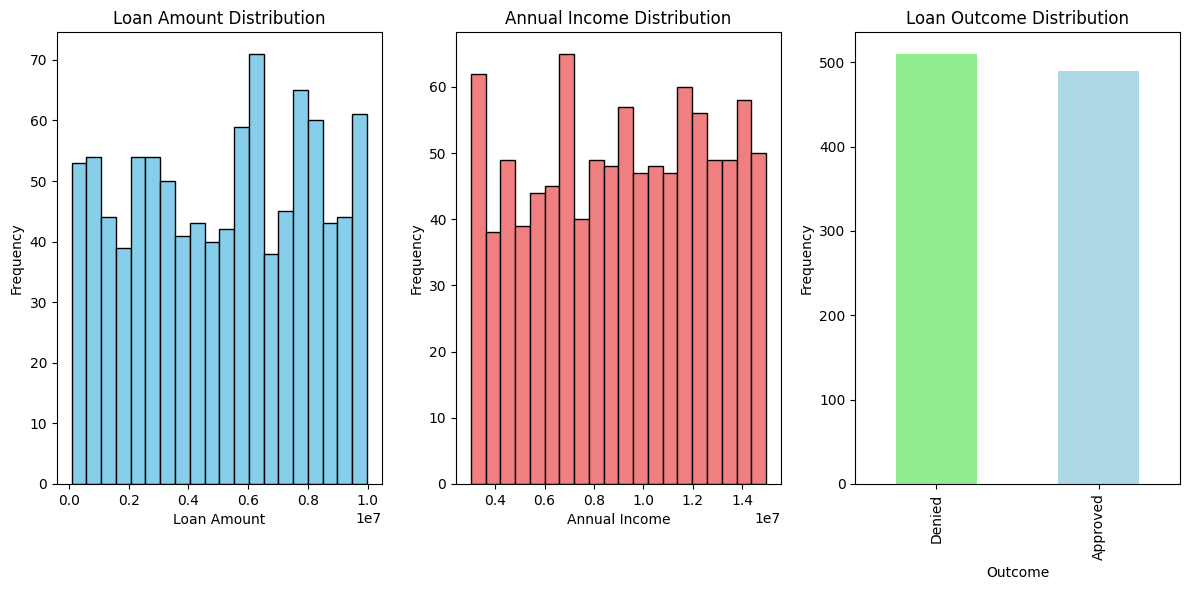

In [71]:
# Visualy exploring the data
plt.figure(figsize=(12,6))

# Loan Amount Distribution
plt.subplot(1,3,1)
plt.hist(df['LoanAmount'],bins= 20,color= 'skyblue', edgecolor='black')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel('Frequency')

# Annual Income Distribution
plt.subplot(1,3,2)
plt.hist(df['AnnualIncome'],bins= 20,color= 'lightcoral', edgecolor='black')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel('Frequency')

# Loan Decision Distribution
plt.subplot(1,3,3)
df['LoanOutcome'].value_counts().plot(kind='bar',color=['lightgreen','lightblue'])
plt.hist(df['LoanAmount'],bins= 20,color= 'skyblue', edgecolor='black')
plt.title("Loan Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [72]:
# Checking for Correlation between Columns

correlation_matrix = numerical_features.corr()
print("Correlation Matrix \n",correlation_matrix)

Correlation Matrix 
                  CreditScore  AnnualIncome  LoanAmount  OutstandingDebt
CreditScore         1.000000      0.019728    0.039641        -0.006990
AnnualIncome        0.019728      1.000000    0.037368         0.021168
LoanAmount          0.039641      0.037368    1.000000        -0.002677
OutstandingDebt    -0.006990      0.021168   -0.002677         1.000000


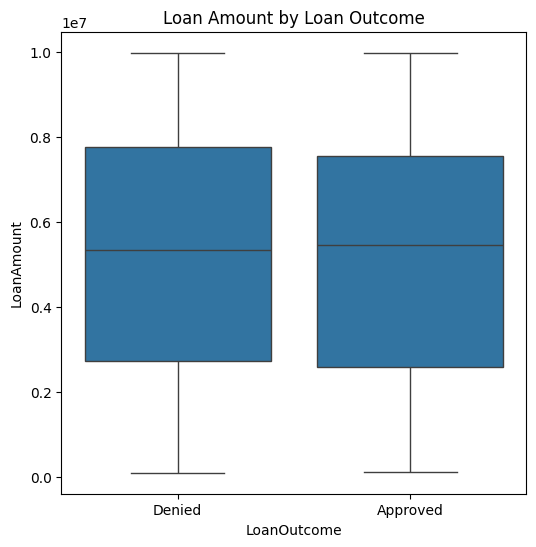

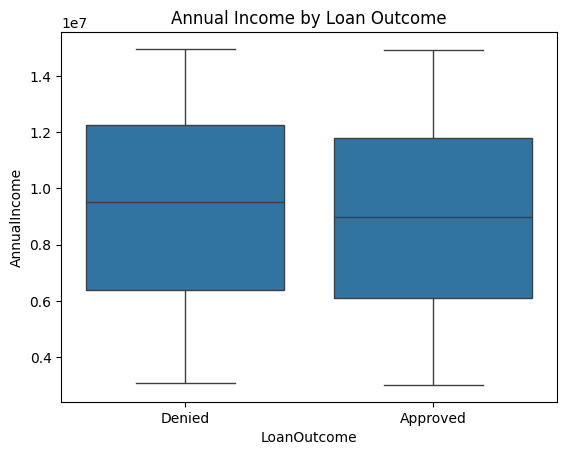

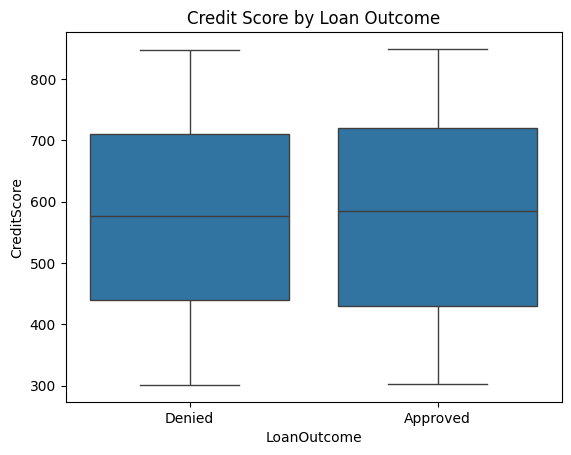

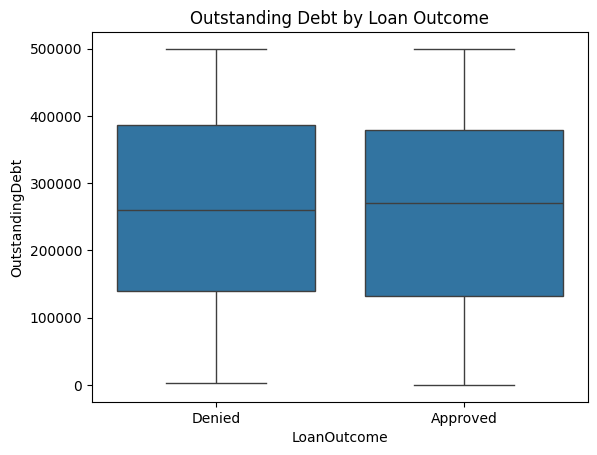

In [73]:
#Further EDA 
plt.figure(figsize=(6, 6))

# Boxplot for Loan Amount by Loan Outcome
sns.boxplot(x='LoanOutcome', y='LoanAmount', data=df)
plt.title('Loan Amount by Loan Outcome')
plt.show()

# Boxplot for Annual Income by Loan Outcome
sns.boxplot(x='LoanOutcome', y='AnnualIncome', data=df)
plt.title('Annual Income by Loan Outcome')
plt.show()

# Boxplot for Credit Score by Loan Outcome
sns.boxplot(x='LoanOutcome', y='CreditScore', data=df)
plt.title('Credit Score by Loan Outcome')
plt.show()

# Boxplot for Outstanding Debt by Loan Outcome
sns.boxplot(x='LoanOutcome', y='OutstandingDebt', data=df)
plt.title('Outstanding Debt by Loan Outcome')
plt.show()


### Step 4: Data Cleaning

In [74]:
if df is None:
    print("Error: Data loading failed. Please check Cell 5.")
else:
    # Unique values in the dataset
    print("\nUnique values in the dataset:\n",df.nunique())

    # Check for null/missing values in the dataset
    print("\nMissing values in the dataset:\n",df.isnull().sum())

    #Check for inconsistencies (example: unexpected values in categorical columns)
    print("\nUnique values in EmploymentStatus:\n", df['EmploymentStatus'].unique())
    print("\nUnique values in LoanOutcome:\n", df['LoanOutcome'].unique())

    #Handle inconsistencies (example: standardize capitalization)
    df['EmploymentStatus'] = df['EmploymentStatus'].str.capitalize() 
    df['LoanOutcome'] = df['LoanOutcome'].str.capitalize()



Unique values in the dataset:
 ApplicationDate        1000
CreditScore             467
AnnualIncome           1000
LoanAmount             1000
EmploymentStatus          3
OutstandingDebt         997
EmploymentStartDate     873
LoanOutcome               2
dtype: int64

Missing values in the dataset:
 ApplicationDate        0
CreditScore            0
AnnualIncome           0
LoanAmount             0
EmploymentStatus       0
OutstandingDebt        0
EmploymentStartDate    0
LoanOutcome            0
dtype: int64

Unique values in EmploymentStatus:
 ['Employed' 'Self-Employed' 'Unemployed']

Unique values in LoanOutcome:
 ['Denied' 'Approved']


## Step 5: Feature Engineering

In [75]:
# Debt-to-Income Ratio (DTI)
df['DTI'] = df['OutstandingDebt'] / (df['AnnualIncome'] / 12)  # Monthly debt / monthly income

# Loan-to-Income Ratio
df['LoanToIncome'] = df['LoanAmount'] / df['AnnualIncome']

# Credit score bins
df['CreditScoreBins'] = pd.cut(df['CreditScore'], bins=[0, 580, 670, 740, 800, 850],
                               labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Employment Length Calculation
df['EmploymentStartDate'] = pd.to_datetime(df['EmploymentStartDate'], errors='coerce')
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
df['EmploymentLength'] = ((df['ApplicationDate'] - df['EmploymentStartDate']).dt.days / 365.25).fillna(0)


# Additional Feature Engineering
df['LoanAmount_log'] = np.log1p(df['LoanAmount']) #Log transformation of LoanAmount
df['AnnualIncome_log'] = np.log1p(df['AnnualIncome']) #Log transformation of AnnualIncome
df['CreditScore_scaled'] = (df['CreditScore'] - df['CreditScore'].min()) / (df['CreditScore'].max() - df['CreditScore'].min()) #Scale CreditScore


#One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['EmploymentStatus', 'LoanOutcome'], drop_first=True)


# Display the updated DataFrame
display(df.head())
print(df.describe())


,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,OutstandingDebt,EmploymentStartDate,DTI,LoanToIncome,CreditScoreBins,EmploymentLength,LoanAmount_log,AnnualIncome_log,CreditScore_scaled,EmploymentStatus_Self-employed,EmploymentStatus_Unemployed,LoanOutcome_Denied
0,2021-01-01 00:00:00.000000000,655,6306291,417034,159749,2011-11-24 19:42:42.126610048,0.303980,0.066130,Fair,9.103354,12.940925,15.657058,0.645985,False,False,True
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,334035,2006-12-25 19:23:45.596053728,0.530553,0.758439,Fair,14.020534,15.561250,15.837743,0.640511,True,False,False
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,159927,2006-05-06 00:34:43.639353248,0.200363,0.196958,Poor,14.663929,14.450240,16.075002,0.344891,False,True,False
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,3438,2009-01-22 19:20:12.496574400,0.005360,1.230085,Very Good,11.947981,16.063516,15.856433,0.835766,False,True,True
4,2021-01-05 09:07:44.864864864,800,9040140,655286,110166,2005-10-19 11:13:37.867909024,0.146236,0.072486,Very Good,15.211499,13.392829,16.017185,0.910584,True,False,False


           ApplicationDate  CreditScore  AnnualIncome    LoanAmount  \
count                 1000  1000.000000  1.000000e+03  1.000000e+03   
mean   2022-07-02 00:00:00   576.893000  9.111708e+06  5.129975e+06   
min    2021-01-01 00:00:00   301.000000  3.019496e+06  9.348400e+04   
25%    2021-10-01 12:00:00   434.000000  6.284852e+06  2.609138e+06   
50%    2022-07-02 00:00:00   580.500000  9.227958e+06  5.359583e+06   
75%    2023-04-01 12:00:00   714.000000  1.208609e+07  7.652186e+06   
max    2023-12-31 00:00:00   849.000000  1.495861e+07  9.974945e+06   
std                    NaN   160.641262  3.461877e+06  2.891096e+06   

       OutstandingDebt            EmploymentStartDate          DTI  \
count      1000.000000                           1000  1000.000000   
mean     256927.025000  2007-10-09 11:58:03.860783616     0.408408   
min          72.000000  2000-01-15 09:52:20.257604823     0.000200   
25%      137270.500000  2003-11-14 12:18:26.933406336     0.175167   
50%      2

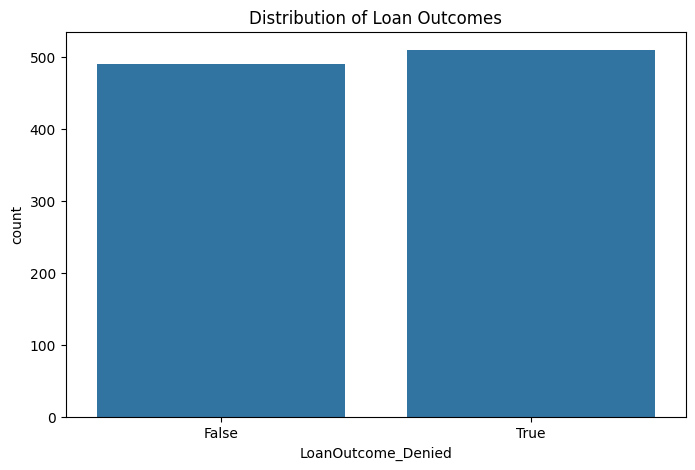

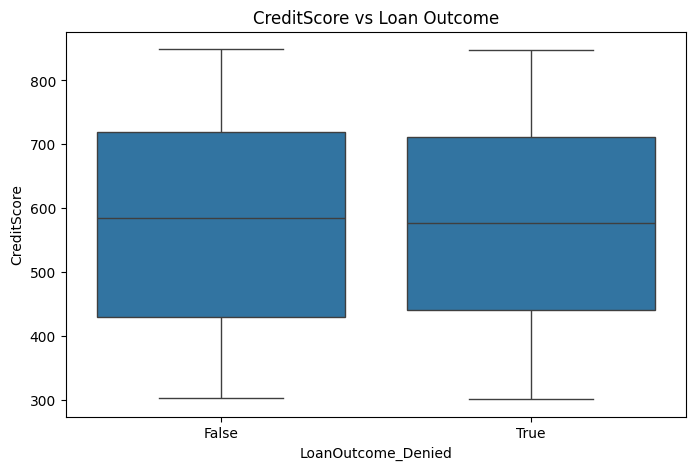

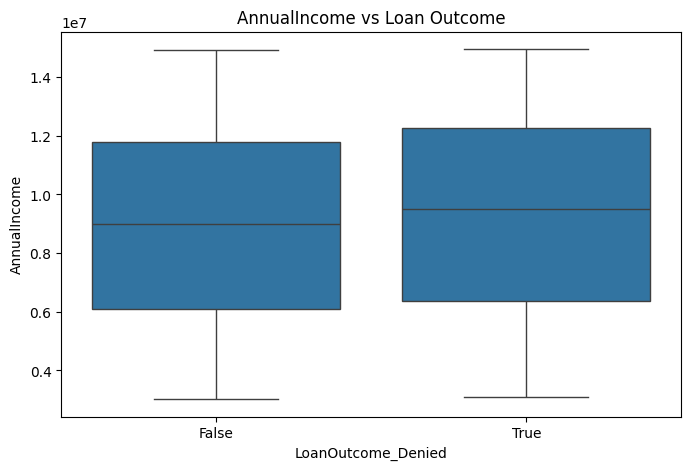

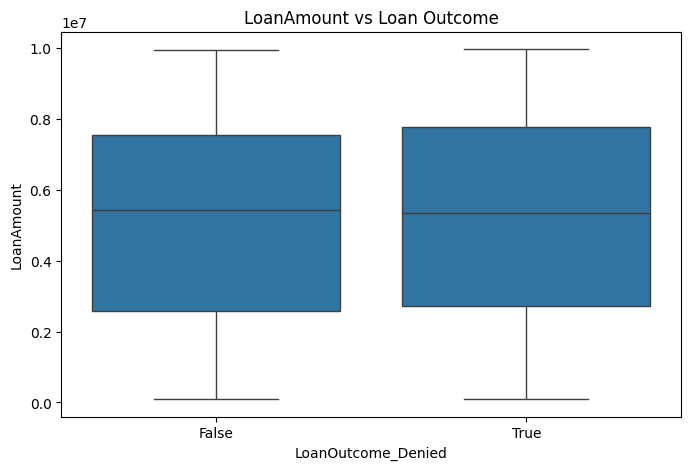

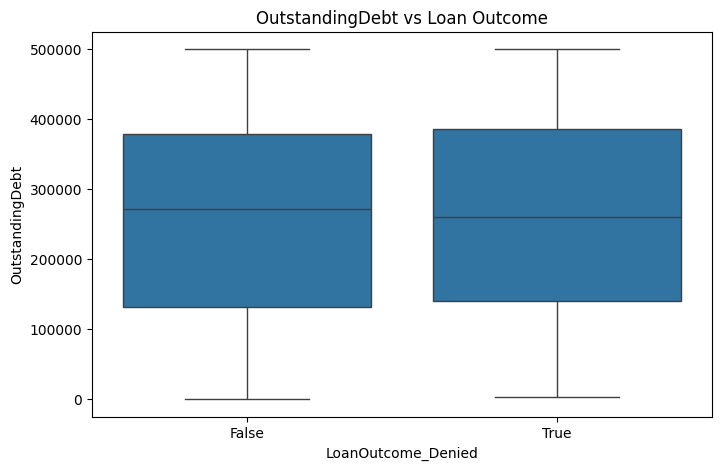

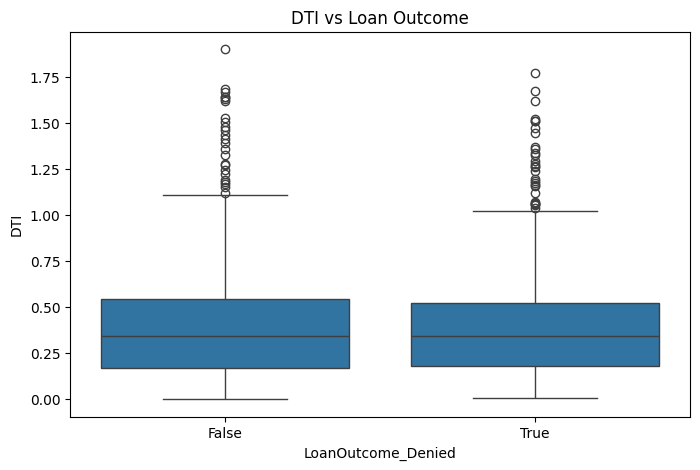

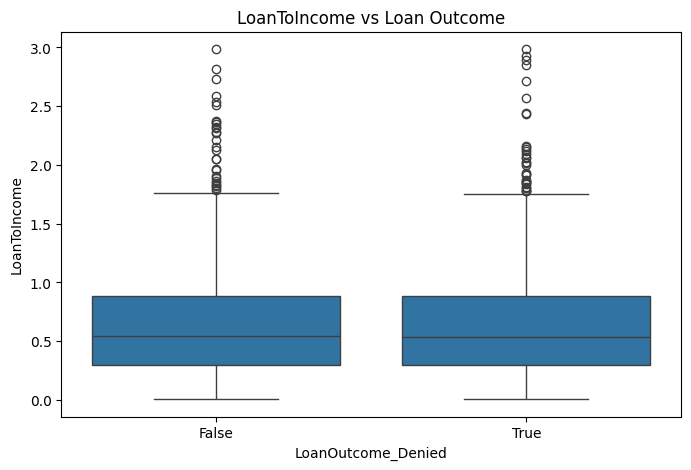

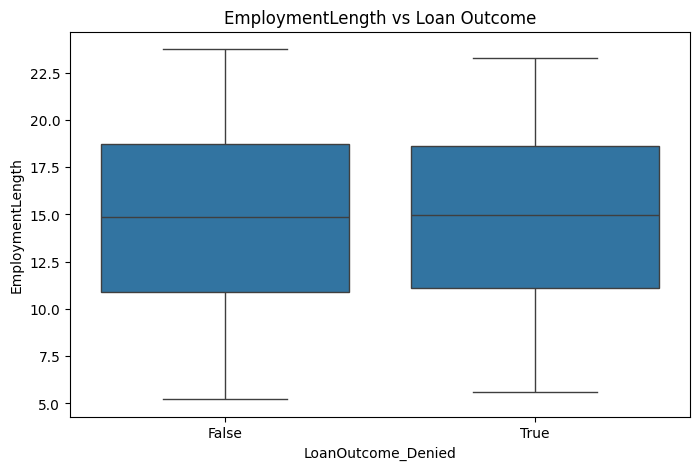

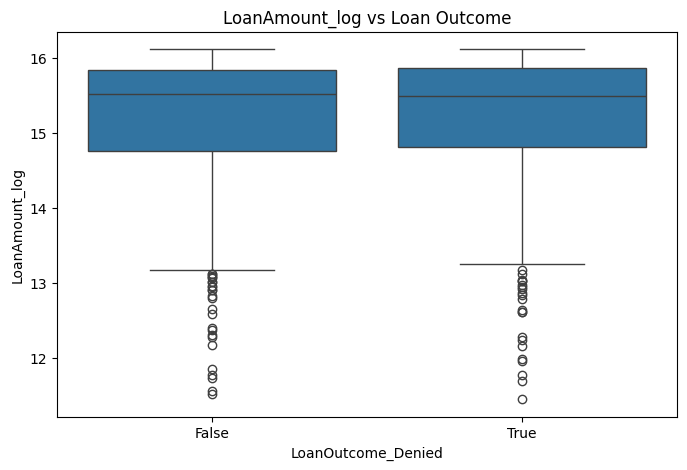

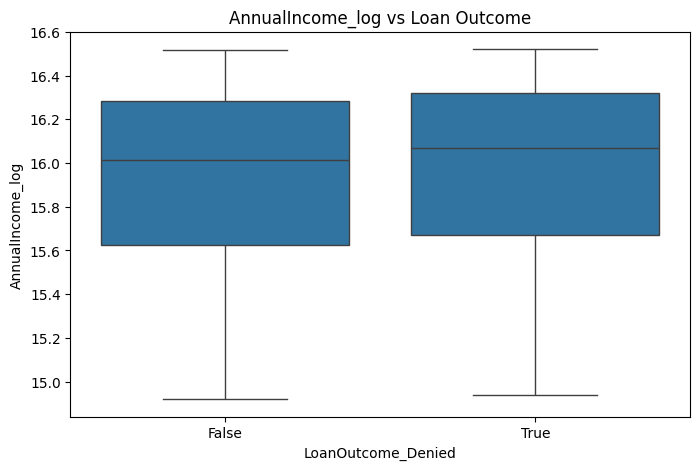

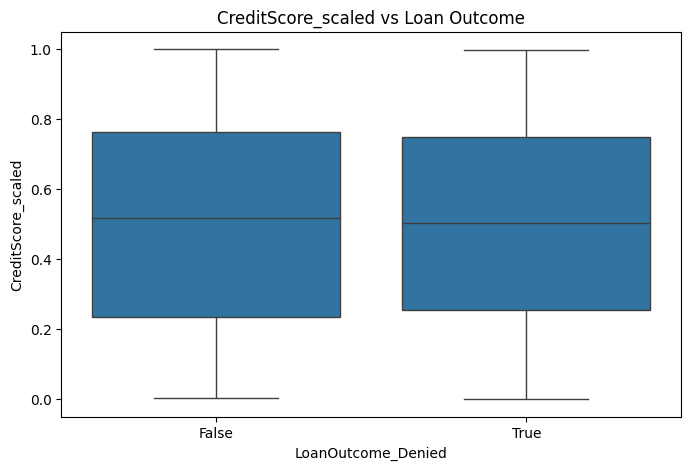

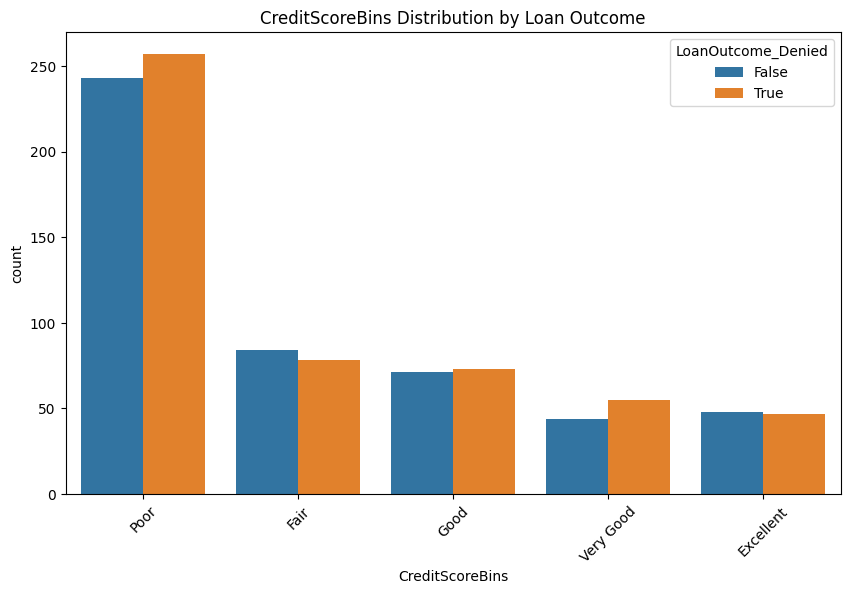

In [76]:
# Loan outcome distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='LoanOutcome_Denied', data=df)
plt.title('Distribution of Loan Outcomes')
plt.show()

# Numerical features vs outcome
num_features = df.select_dtypes(include=['number']).columns
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='LoanOutcome_Denied', y=feature, data=df)
    plt.title(f'{feature} vs Loan Outcome')
    plt.show()

# Categorical features
cat_features = df.select_dtypes(include=['object', 'category']).columns

for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='LoanOutcome_Denied', data=df)
    plt.title(f'{feature} Distribution by Loan Outcome')
    plt.xticks(rotation=45)
    plt.show()

### Step 6: Data Preprocessing 
Some steps have been moved up into feature engineering above

### Step 7: Model Selection 